# An attempt for Weather Prediction Using Machine Learning (Python)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
weather = pd.read_csv('local_weather.csv', index_col = 'DATE')
weather.head(5)

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


## 1. Cleaning Data

In [38]:
# deal with missing values 
weather.isnull().sum()/weather.shape[0] #deal in pct because it's easier
# look at documentation that mentions the core values
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']
#check no values
core_weather.isnull().sum()/core_weather.shape[0]

precip        0.016668
snow          0.324990
snow_depth    0.317634
temp_max      0.000534
temp_min      0.000593
dtype: float64

In [39]:
core_weather['snow'].value_counts() #only one day of snow so not helpful
del core_weather['snow']
del core_weather['snow_depth']

In [41]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [52]:
core_weather.loc['1983-10-20':'1983-11-05'] #what to replace missing values with

# 1. Replace with the value that it was the day before
# 2. Replace with 0                                        << this is what we're gonna do here

core_weather['precip'] = core_weather['precip'].fillna(0)
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [59]:
# very few N/A in min/max temp
core_weather[pd.isnull(core_weather['temp_min'])]
# let's do the forward fill
core_weather = core_weather.fillna(method='ffill')
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [58]:
#last check
core_weather.isnull().sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

## 2. Data Types

In [ ]:
#verifying we have the correct data types -> numericla values

In [60]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [68]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index
# .year, .month, .day, etc

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

> ### Documentation says that '9999's are data that are missing or has not been received. We need to take care of that too

In [72]:
core_weather.apply(lambda x : (x == 9999).sum())
#thankfully nothing

precip      0
temp_max    0
temp_min    0
dtype: int64

## 3. Data Analysis

<AxesSubplot:xlabel='DATE'>

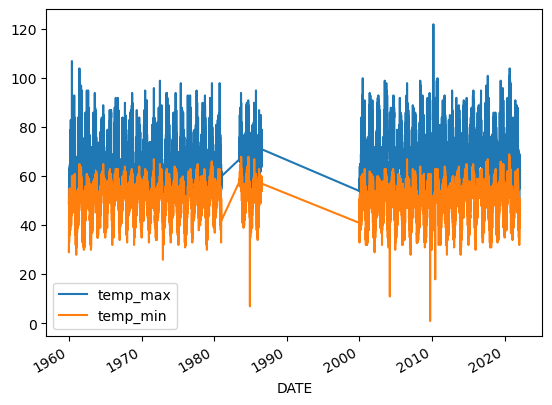

In [73]:
core_weather[['temp_max', 'temp_min']].plot()

It looks like there is a little bit of data missing

<AxesSubplot:>

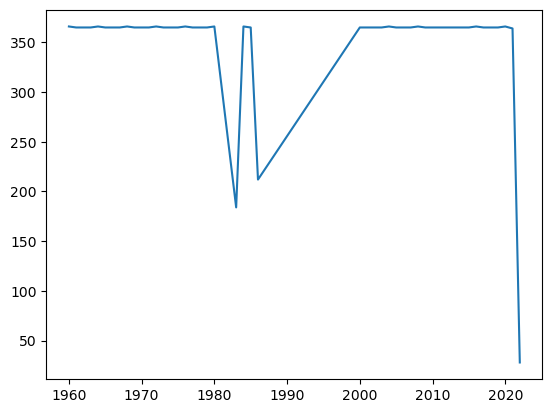

In [87]:
core_weather.index.year.value_counts().sort_index().plot()
#there is are gaps: 1981, 1982, some from 1983 and 1987-1999
#outliers dont seem unreasonable

<AxesSubplot:xlabel='DATE'>

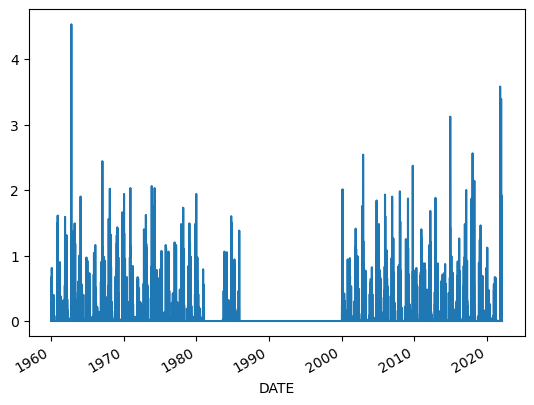

In [83]:
core_weather['precip'].plot()
#maybe a few, but nothing too bad

<AxesSubplot:xlabel='DATE'>

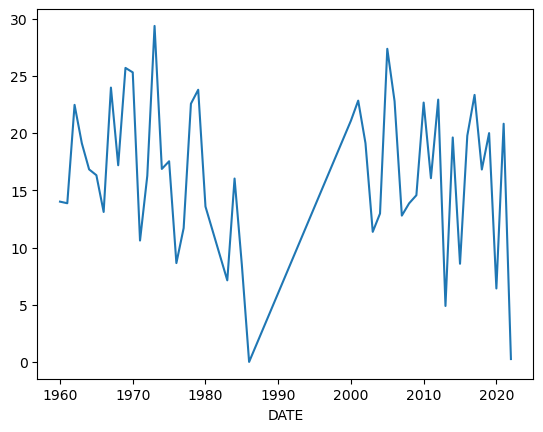

In [86]:
core_weather.groupby(core_weather.index.year).sum()['precip'].plot()

## 4. Train our first model - Ridge Regression

In [93]:
# first thing is to figure what to predict 'target' = tomorrow max temperature

core_weather['target'] = core_weather.shift(-1)['temp_max']
core_weather = core_weather.iloc[:-1].copy() #get rid of last row, because it doesn't have a tomorrow
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-21,0.0,68.0,41.0,69.0
2022-01-22,0.0,69.0,44.0,60.0
2022-01-23,0.0,60.0,41.0,60.0


In [108]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)

In [109]:
predictors = ['precip', 'temp_max', 'temp_min']

In [118]:
train = core_weather.loc[:'2020-12-31']
test = core_weather.loc['2021-01-01':]

In [119]:
reg.fit(train[predictors], train['target'])

Ridge(alpha=0.1)

In [120]:
predictions = reg.predict(test[predictors])

In [126]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test['target'], predictions)

## 5. Evaluation of the Model

<AxesSubplot:xlabel='DATE'>

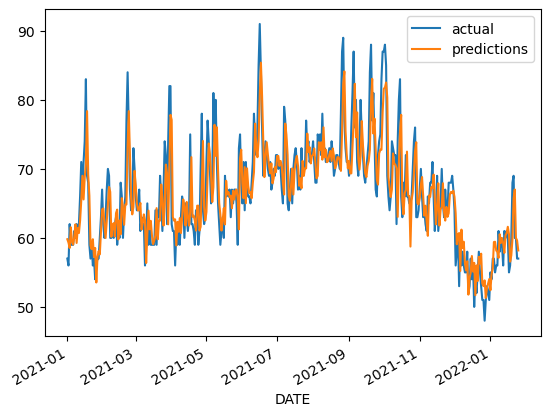

In [124]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['actual', 'predictions']
combined.plot()  # predictions look a bit more conservative in general

In [125]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

## 6. Create a Function that Makes a Prediction

In [129]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['actual', 'predictions']
    return error, combined

## 7. Adding in Rolling Means

In [138]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max']
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min']
core_weather  #NaN means that there are no 30 dyas prior to that

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2022-01-21,0.0,68.0,41.0,69.0,56.366667,0.828922,1.658537
2022-01-22,0.0,69.0,44.0,60.0,56.833333,0.823671,1.568182
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333,1.463415


In [142]:
# so we remove the first 30 rows

core_weather = core_weather.iloc[30:, :].copy()

In [143]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [145]:
error, combined = create_predictions(predictors, core_weather, reg)

In [148]:
error # is slightly reduced :  on average we're 3.35 degrees away from reality

3.352704809989955

<AxesSubplot:xlabel='DATE'>

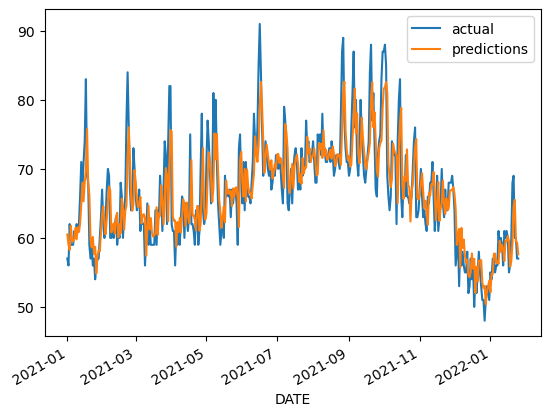

In [149]:
combined.plot()

## 8. Adding in Monthly and Daily Averages

In [153]:
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x : x.expanding(1).mean()) # make sure you only cosnider previous dates for any given date

In [156]:
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year).apply(lambda x : x.expanding(1).mean())

In [166]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [167]:
error, combined = create_predictions(predictors, core_weather, reg)

In [170]:
error # slight decrease

3.3096694473481962

## 9. Running Model Diagnostics

In [172]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.14343362,   0.08006707])

In [174]:
core_weather.corr()['target']

precip            -0.205415
temp_max           0.821690
temp_min           0.596095
target             1.000000
month_max          0.686906
month_day_max     -0.421594
max_min            0.045234
monthly_avg        0.689877
day_of_year_avg    0.712387
Name: target, dtype: float64

In [179]:
combined['diff'] = (combined['actual'] - combined['predictions']).abs()
combined.sort_values('diff', ascending=False).head()

,actual,predictions,diff
DATE,,,
2021-01-17,83.0,68.585837,14.414163
2021-05-07,81.0,67.774432,13.225568
2021-04-01,62.0,75.178360,13.178360
2021-02-22,84.0,71.168844,12.831156
2021-10-16,66.0,78.823197,12.823197


This last part is offered for investigation: See what exactly caused the big deviations

## 10. Discussion

> 1. Perhaps apply this for a weekly prediction
> 2. Use data from many weather stations (fill in gaps, or add more sources)
> 3. Perhaps add more predictors from the original dataset
> 4. Or create more ourselves
> 5. Perhaps use a different ML model
> 6. Use predictions for many years